In [1]:
import pandas as pd

Open metadata.

In [2]:
metadata_df = pd.read_csv('../data/2020_03_06_arxiv_metadata_astroph/arxiv_metadata_astroph.csv', 
                         dtype={'filename_parsed': str})
metadata_df

/Users/briennakh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,identifier,filename,spec,title,datestamp,created,updated,authors,categories,journal,doi,abstract,comments,date_retrieved,filename_parsed
0,oai:arXiv.org:0704.0009,704.001,physics:astro-ph,"The Spitzer c2d Survey of Large, Nearby, Inste...",2010-03-18,2007-04-02,NaN,"Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...",astro-ph,"Astrophys.J.663:1149-1173,2007",10.1086/518646,We discuss the results from the combined IRA...,NaN,2020-03-07 02:10:36.300743,0704.0009
1,oai:arXiv.org:0704.0017,704.002,physics:astro-ph,Spectroscopic Observations of the Intermediate...,2009-06-23,2007-03-31,NaN,"Nceba Mhlahlo, David H. Buckley, Vikram S. Dhi...",astro-ph,"Mon.Not.Roy.Astron.Soc.378:211-220,2007",10.1111/j.1365-2966.2007.11762.x,Results from spectroscopic observations of t...,NaN,2020-03-07 02:10:36.300743,0704.0017
2,oai:arXiv.org:0704.0023,704.002,physics:astro-ph,ALMA as the ideal probe of the solar chromosphere,2009-06-23,2007-03-31,NaN,"M. A. Loukitcheva, S. K. Solanki, S. White",astro-ph,"Astrophys.Space Sci.313:197-200,2008",10.1007/s10509-007-9626-1,"The very nature of the solar chromosphere, i...",NaN,2020-03-07 02:10:36.300743,0704.0023
3,oai:arXiv.org:0704.0044,704.004,physics:astro-ph,Astrophysical gyrokinetics: kinetic and fluid ...,2015-05-13,2007-03-31,2009-05-09,"A. A. Schekochihin, S. C. Cowley, W. Dorland, ...",astro-ph nlin.CD physics.plasm-ph physics.spac...,"ApJS 182, 310 (2009)",10.1088/0067-0049/182/1/310,We present a theoretical framework for plasm...,NaN,2020-03-07 02:10:36.300743,0704.0044
4,oai:arXiv.org:0704.0048,704.005,physics:astro-ph,Inference on white dwarf binary systems using ...,2008-11-26,2007-03-31,2007-04-03,"Alexander Stroeer, John Veitch, Christian Roev...",gr-qc astro-ph,"Class.Quant.Grav.24:S541-S550,2007",10.1088/0264-9381/24/19/S17,We report on the analysis of selected single...,NaN,2020-03-07 02:10:36.300743,0704.0048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267789,oai:arXiv.org:quant-ph/9903043,quant-ph/9903043,physics:astro-ph,A Possible Anisotropy in Blackbody Radiation V...,2007-05-23,1999-03-12,1999-06-07,T K Rai Dastidar,quant-ph astro-ph hep-th,Mod.Phys.Lett. A14 (1999) 1193-1198,NaN,A non-local gauge symmetry of a complex scal...,NaN,2020-03-07 02:10:36.300743,quant-ph9903043
267790,oai:arXiv.org:quant-ph/9903053,quant-ph/9903053,physics:astro-ph,Father Time. I. Does the Cosmic Microwave Back...,2009-10-31,1999-03-15,1999-10-21,T K Rai Dastidar,quant-ph astro-ph hep-th,Mod.Phys.Lett. A14 (1999) 2499-2505,10.1142/S0217732399002601,The existence of a non-thermodynamic arrow o...,NaN,2020-03-07 02:10:36.300743,quant-ph9903053
267791,oai:arXiv.org:quant-ph/9907088,quant-ph/9907088,physics:astro-ph,On Bures fidelity of displaced squeezed therma...,2008-12-18,1999-07-27,NaN,"Xiang-Bin Wang, C. H. Oh, L. C. Kwek",quant-ph astro-ph,"Phys.Rev.A58:4186,1998",10.1103/PhysRevA.58.4186,Fidelity plays a key role in quantum informa...,NaN,2020-03-07 02:10:36.300743,quant-ph9907088
267792,oai:arXiv.org:solv-int/9404002,solv-int/9404002,physics:astro-ph,Dynamical Systems Accepting the Normal Shift,2008-02-03,1993-04-07,NaN,R. A. Sharipov,solv-int alg-geom astro-ph gr-qc hep-th math.A...,NaN,NaN,Newtonian dynamical systems accepting the no...,NaN,2020-03-07 02:10:36.300743,solv-int9404002


Parameters to change:

- `window` — size of the sliding window used to parse texts
- `alpha` — initial learning rate of the network
- `sample` — allows the model to reduce the importance given to high-frequency words
- `dm` — training algorithm (PV-DM or PV-DBOW)
- `hs` — whether hierarchical softmax or negative sampling is used during training
- `dimensions` 

Default values:
- `window_size` — 5
- `alpha` — 
- `sample` – 
- `dm` – 1 (PV-DM)
- `hs` – 

Possible values: 

Set up values of possible parameters.

Write the script that will go into the bash script.

In [124]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
import matplotlib.pyplot as plt
import numpy as np
import scipy

Find each paper's author-assigned subcategory. If the paper has none, remove it from the data. 

In [63]:
metadata = pd.read_csv('../data/2020_03_06_arxiv_metadata_astroph/arxiv_metadata_astroph.csv')
print('Total number of papers: ' + str(len(metadata)))

# Specify the subdomains we want to target 
subdomains = ['astro-ph.SR',
              'astro-ph.CO',
              'astro-ph.GA',
              'astro-ph.HE',
              'astro-ph.EP',
              'astro-ph.IM']
subdomain_names = ['Solar and Stellar Astrophysics',
                   'Cosmology and Nongalactic Astrophysics',
                   'Astrophysics of Galaxies',
                   'High Energy Astrophysical Phenomena',
                   'Earth and Planetary Astrophysics',
                   'Instrumentation and Methods for Astrophysics']

print('We are keeping only papers that have been labeled with any of the following ' 
      + str(len(subdomains)) + ' subdomains:\n' + str(subdomain_names))

labels = metadata['categories'].str.split(' ')        # Get all labels for each paper
subdomain_labels = []     
papers_to_drop = []

for i, _ in enumerate(labels):                         # For each paper,
    temp = []                                          # create a temporary list of subdomain labels and
    has_subdomain_label = False                        # state that the paper has no subdomain labels yet
    for j,_ in enumerate(labels[i]):                   # For each of the paper's labels,
        if labels[i][j] in subdomains:                 # if the paper has a subdomain label
            temp.append(labels[i][j])                  # add the subdomain label to that paper's subdomain labels list
            has_subdomain_label = True                 # and mark that the paper has at least one subdomain label
            
        if j == (len(labels[i]) - 1):                  # When done looking at the last label for that paper,
            if not has_subdomain_label:                # if that paper had no subdomain labels,
                papers_to_drop.append(i)               # mark it to be dropped
            else:                
                subdomain_labels.append(temp)          # otherwise add its subdomain labels to the master list
                
metadata_filtered = metadata.drop(papers_to_drop)
metadata_filtered['subdomains'] = subdomain_labels
print('Number of papers dropped: ' + str(len(papers_to_drop)))
print('Number of papers left: ' + str(len(metadata_filtered)))

/Users/briennakh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total number of papers: 267794
We are keeping only papers that have been labeled with any of the following 6 subdomains:
['Solar and Stellar Astrophysics', 'Cosmology and Nongalactic Astrophysics', 'Astrophysics of Galaxies', 'High Energy Astrophysical Phenomena', 'Earth and Planetary Astrophysics', 'Instrumentation and Methods for Astrophysics']
Number of papers dropped: 105283
Number of papers left: 162511


In [208]:
subdomain_distribution = pd.Series([item for sublist in metadata_filtered['subdomains'] for item in sublist]).value_counts()
subdomain_distribution

astro-ph.CO    50049
astro-ph.SR    41790
astro-ph.GA    40221
astro-ph.HE    37018
astro-ph.EP    17766
astro-ph.IM    17246
dtype: int64

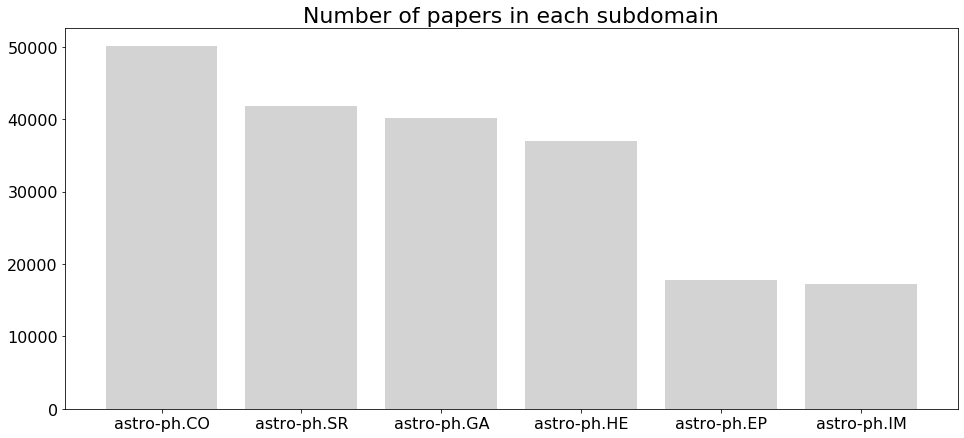

In [215]:
plt.figure(figsize=(16,7))
plt.bar(subdomain_distribution.keys(), subdomain_distribution.values, color='lightgray')
plt.title('Number of papers in each subdomain', fontdict=dict(size=22))
plt.show()

**Visualize how the distributions may have changed.**

Distribution of abstract word counts. 

We can see that the most common length of abstracts is 250 words which makes sense given the 250-word limit that journals often have.

*WILL DO THIS FOR FULL TEXTS TOO.*

In [145]:
abstracts = [abstract.replace('\n', ' ').strip() for abstract in metadata['abstract']]
abstracts_word_count = [len(abstract.split(' ')) for abstract in abstracts]
abstracts_filtered_word_count = list(pd.Series(abstracts_word_count).drop(papers_to_drop))

How to decide optimal number of bins? https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram

One solution is to create a graph that shows every value. Either a dot plot, or a cumulative frequency distribution, which doesn't require any bins. *This took too long to plot.*

If you use too few bins, the histogram doesn't really portray the data very well. If you have too many bins, you get a broken comb look, which also doesn't give a sense of the distribution. The simplest method is to set the number of bins equal to the square root of the number of values you are binning.

I just ended up eyeing it. 

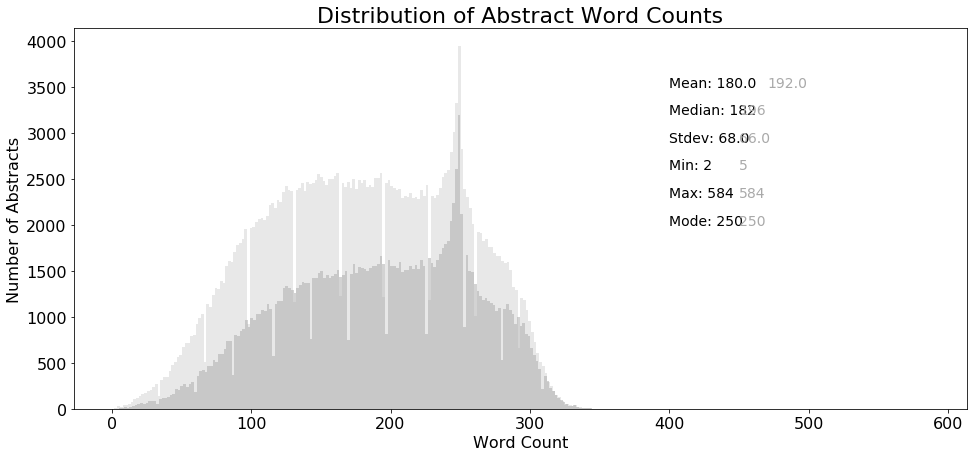

In [177]:
plt.figure(figsize=(16,7))
plt.hist(abstracts_word_count, bins=300, color='lightgray', alpha=0.5)
plt.text(400, 3500, "Mean: " + str(round(np.mean(abstracts_word_count))), size=14)
plt.text(400, 3200, "Median: " + str(int(round(np.median(abstracts_word_count)))), size=14)
plt.text(400, 2900, "Stdev: " + str(round(np.std(abstracts_word_count))), size=14)
plt.text(400, 2600, "Min: " + str(round(np.min(abstracts_word_count))), size=14)
plt.text(400, 2300, "Max: " + str(round(np.max(abstracts_word_count))), size=14)
plt.text(400, 2000, "Mode: " + str(scipy.stats.mode(abstracts_word_count)[0][0]), size=14)
plt.gca().set(ylabel='Number of Abstracts', xlabel='Word Count')
plt.title('Distribution of Abstract Word Counts', fontdict=dict(size=22))
plt.rc('xtick',labelsize=16)
plt.rc('axes',labelsize=16)
plt.rc('ytick',labelsize=16)

plt.hist(abstracts_filtered_word_count, bins=300, color='darkgray', alpha=0.5)
plt.text(40, 3500, str(round(np.mean(abstracts_filtered_word_count))), size=14, color='darkgray')
plt.text(450, 3200, str(int(round(np.median(abstracts_filtered_word_count)))), size=14, color='darkgray')
plt.text(450, 2900, str(round(np.std(abstracts_filtered_word_count))), size=14, color='darkgray')
plt.text(450, 2600, str(round(np.min(abstracts_filtered_word_count))), size=14, color='darkgray')
plt.text(450, 2300, str(round(np.max(abstracts_filtered_word_count))), size=14, color='darkgray')
plt.text(450, 2000, str(scipy.stats.mode(abstracts_filtered_word_count)[0][0]), size=14, color='darkgray')

plt.show()

Distribution of years. 

In [216]:
years = pd.to_datetime(metadata['created']).apply(lambda x: x.year)
years_filtered = years.drop(papers_to_drop)

In [224]:
years_count = years.value_counts()
years_filtered_count = years_filtered.value_counts()

In [225]:
years_count

2019    16579
2018    15944
2016    15176
2017    15133
2015    14938
2014    14555
2013    14238
2012    13808
2011    13642
2010    13114
2009    12489
2008    11357
2007    11346
2006    10382
2005     9795
2004     9256
2003     8833
2002     7848
2001     7598
2000     7028
1999     6238
1998     5315
1997     3917
2020     2707
1996     2687
1995     1911
1994     1222
1993      617
1992      121
Name: created, dtype: int64

In [226]:
years_filtered_count

2019    16579
2018    15944
2016    15176
2017    15133
2015    14938
2014    14555
2013    14238
2012    13808
2011    13642
2010    13114
2009    12489
2020     2707
2008      105
2007       31
2006       15
2005       14
2004        8
2003        6
1998        3
1999        2
2002        1
2000        1
1997        1
1996        1
Name: created, dtype: int64

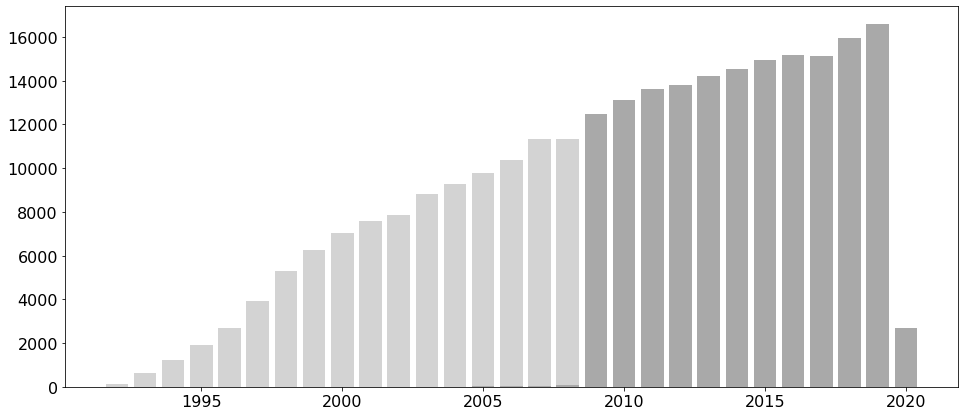

In [228]:
plt.figure(figsize=(16,7))
plt.bar(years_count.keys(), years_count.values, color='lightgray')
plt.bar(years_filtered_count.keys(), years_filtered_count.values, color='darkgray')
plt.show()

Some stragglers in 2007, 2008, etc, but probably because their papers were revised 2009>. 

Distribution of 

Tokenize abstracts.

In [ ]:
train_corpus = [TaggedDocument(words=nltk.word_tokenize(_d.lower()), tags=[str(i)]) for i,_d in enumerate(abstracts)]